K-means clustering aims to partition n observations into k clusters, where each observation belongs to the cluster with the nearest mean. The "means" in K-means refers to the centroids of the clusters, which are the arithmetic averages of the data points in each cluster.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
np.random.seed(42)

In [3]:
#generate synthetic data

X= np.random.rand(100,2)

In [4]:
# apply K-means clustering with 7 clusters

kmeans= KMeans(n_clusters=7, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=7, random_state=42)

In clustering, a cluster label refers to the identifier assigned to each data point, indicating which cluster it belongs to. When you apply a clustering algorithm like K-means, the algorithm groups the data into clusters based on similarity or distance metrics, and each data point is then labeled according to its assigned cluster.

In [5]:
# predict cluster labels for the data
labels= kmeans.predict(X)

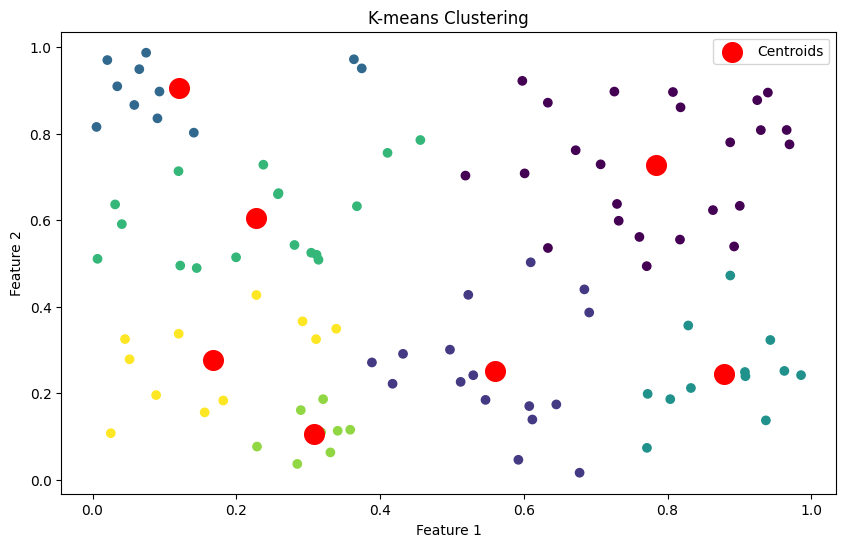

In [6]:
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis') #cmap stands for colormap
#Viridis is a perceptually uniform colormap, which means it is designed to be easily interpreted by the human eye.
#Colors transition smoothly without any sudden jumps or misleading gradients,
#making it an excellent choice for visualizing data.
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend() #This command adds a legend to the plot, using the labels specified in the plot function.
plt.show()

Now let us try with iris dataset

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm # am= colormaps; translate scalar data to colors
from sklearn.datasets import load_iris

In [8]:
X, y = load_iris(return_X_y=True)

In [9]:
#Find optimum number of cluster
sse = [] #Sum of squared error

for i in range (1,10):
    kmean= KMeans(n_clusters=i, random_state=1)
    kmean.fit(X)
    sse.append(kmean.inertia_)

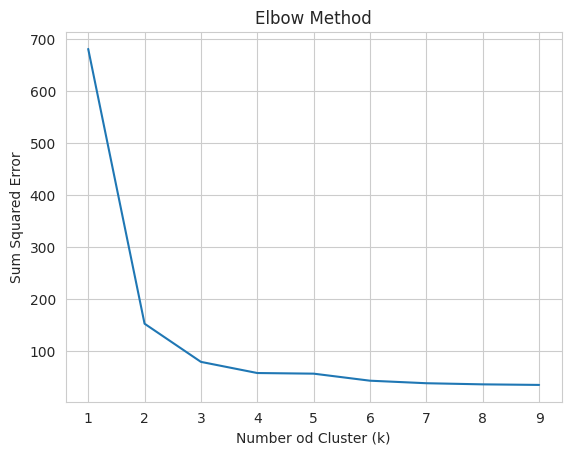

In [10]:
sns.set_style("whitegrid")
fig= sns.lineplot(x=range(1,10), y=sse)
fig.set(xlabel= 'Number od Cluster (k)',
       ylabel= 'Sum Squared Error',
       title= "Elbow Method")
plt.show()

From the above graph, we can observe that at k=2 and k=3 elbow-like situation. So, we are considering K=3

In [11]:
kmeans_final= KMeans(n_clusters=3, random_state=1)
kmeans_final.fit(X)

KMeans(n_clusters=3, random_state=1)

In [12]:
kmeans_final.cluster_centers_

array([[5.88360656, 2.74098361, 4.38852459, 1.43442623],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85384615, 3.07692308, 5.71538462, 2.05384615]])

In [13]:
predict= kmeans_final.fit_predict(X)
predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

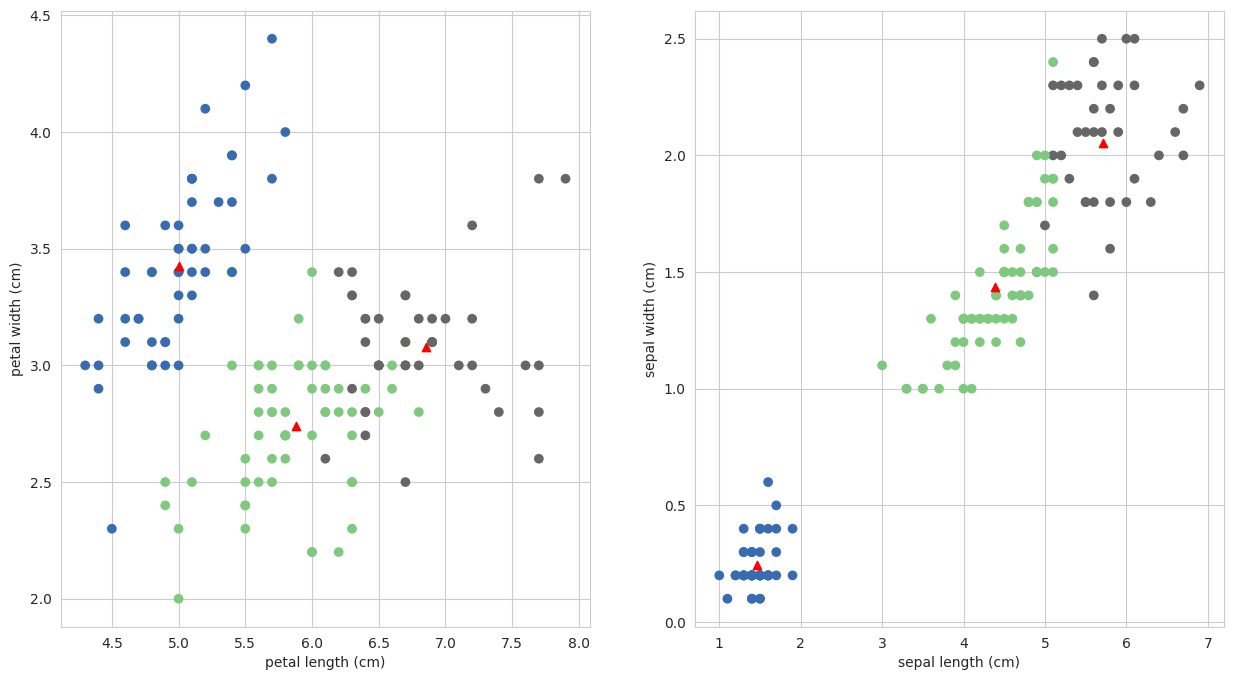

In [14]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c = predict, cmap=cm.Accent)
plt.grid(True)
for center in kmeans_final.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
    
plt.subplot(1,2,2)   
plt.scatter(X[:,2],X[:,3],c = predict, cmap=cm.Accent)
plt.grid(True)
for center in kmeans_final.cluster_centers_:
    center = center[2:4]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()